# [실습과제#3] 다층 인공신경망 구조의 분류기

In [2]:
import numpy as np 
import matplotlib.pylab as plt 

np.random.seed(2021) 

# Logical AND 연산 

In [14]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

In [15]:
x1_min = -0.5 
x1_max = 1.5 

x2_min = -0.5 
x2_max = 1.5 

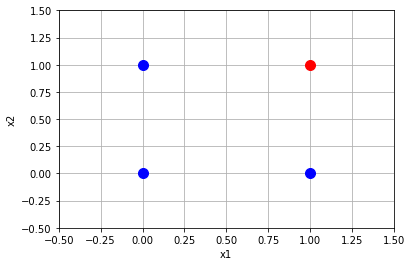

In [16]:
plt.plot(X[:-1, 0], X[:-1, 1], 'b.', markersize=20)
plt.plot(X[-1, 0], X[-1, 1], 'r.', markersize=20)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

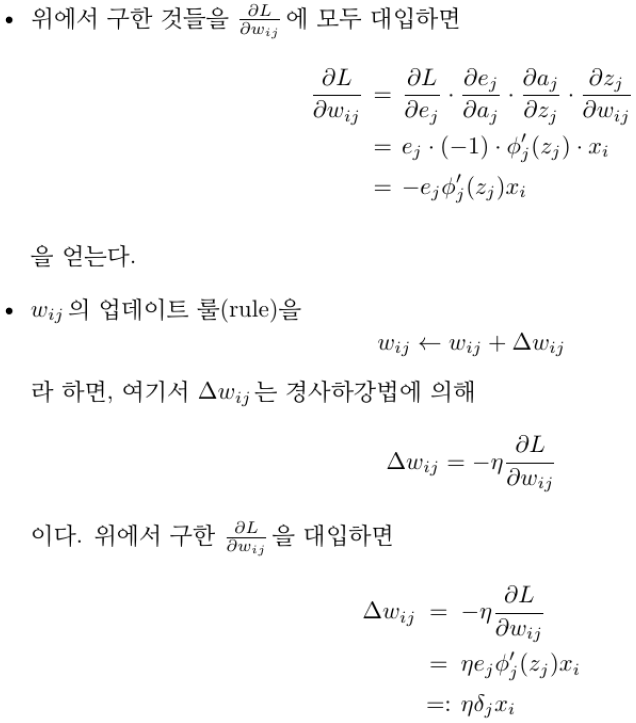

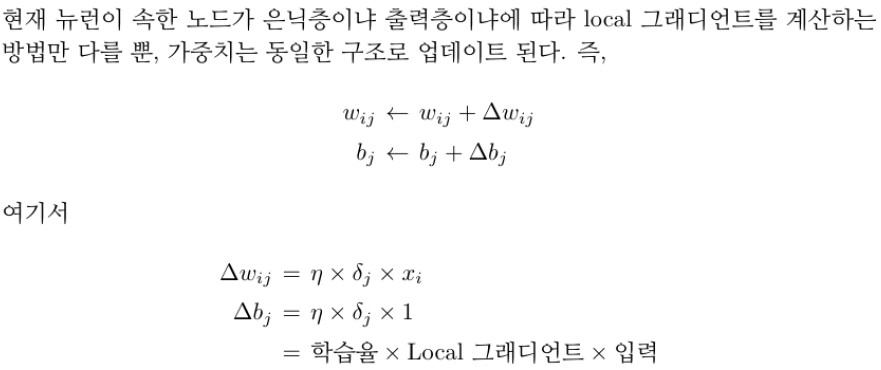

In [17]:
# [11강] 인공신경망 - Learnable machine (1).pdf 
# [6강] 로지스틱회귀_v2.pdf p.12 
# 밑바닥부터 시작하는 딥러닝 p.137 
class TwoLayer_Classifier: 
    def __init__(self, in_features=100, hidden_features=100, out_features=100, eta=0.001): 
        self.eta = eta 

        self.W1 = np.random.randn(in_features, hidden_features) 
        self.b1 = np.random.randn(1, hidden_features) 
        self.W2 = np.random.randn(hidden_features, out_features) 
        self.b2 = np.random.randn(1, out_features) 

        self.sigmoid = lambda z : 1 / (1 + np.exp(-z)) 

        self.y_hat = None 

        self.for_backward = {} 
        self.for_backward['e'] = None 
        self.for_backward['a2'] = None 
        self.for_backward['a1'] = None 
        self.for_backward['X'] = None 
        ################################################## 
        #     logistic sigmoid에 대한 편미분 구하기      # 
        ################################################## 
        self.sigmoid_prime = lambda a : a*(1-a)
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.grad = {} 
        self.grad['W2'] = None 
        self.grad['b2'] = None 
        self.grad['W1'] = None 
        self.grad['b1'] = None 

    def forward(self, X): 
        ################################################## 
        #                  순전파 구현                   # 
        ################################################## 
        z1 = self.b1 + X.dot(self.W1)
        a1 = self.sigmoid(z1)
        z2 = self.b2 + a1.dot(self.W2)
        a2 = self.sigmoid(z2)        
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.y_hat = a2 

        self.for_backward['X'] = X 
        self.for_backward['a1'] = a1 
        self.for_backward['a2'] = a2 

        return a2 

    def mean_square_error(self, y): 
        N = y.shape[0] 
        
        assert N == self.y_hat.shape[0]
        ################################################## 
        #           오차 e와 손실 loss 구하기            # 
        ################################################## 
        e = y - self.y_hat
        loss = np.sum(e**2)/2
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.for_backward['e'] = e 

        return loss 

    def backward(self): 
        eta = self.eta 

        e = self.for_backward['e']
        a2 = self.for_backward['a2']
        a1 = self.for_backward['a1']
        X = self.for_backward['X']

        N = X.shape[0]
        ################################################## 
        #          역전파 구현(gradient 구하기)          # 
        ################################################## 
        dLde = e 
        deda2 = np.tile(-1, (N, 1)) 
        da2dz2 = self.sigmoid_prime(a2)
        dz2dW2 = a1
        dz2db2 = np.tile(1, (N, 1))
        delta2 = dLde * deda2 * da2dz2
        delta2 = (-1) * delta2 
        dLdW2 = dz2dW2.T.dot(delta2) 
        dLdb2 = dz2db2.T.dot(delta2)

        # [11강] 인공신경망 - Learnable machine (1).pdf p.23 
        delta1 = self.sigmoid_prime(a1)*np.sum(self.W2.dot(delta2.T),axis=1)
        dz1dW1 = X 
        dz1db1 = np.tile(1, (N, 1)) 
        dLdW1 = dz1dW1.T.dot(delta1)
        dLdb1 = dz1db1.T.dot(delta1)
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.W2 = self.W2 + eta * dLdW2 
        self.W1 = self.W1 + eta * dLdW1 
        self.b2 = self.b2 + eta * dLdb2 
        self.b1 = self.b1 + eta * dLdb1 

        self.grad['W2'] = dLdW2 
        self.grad['W1'] = dLdW1 
        self.grad['b2'] = dLdb2 
        self.grad['b1'] = dLdb1 

In [ ]:
################################################## 
# Logical AND 연산 구현 위한 2층 인공신경망 생성 # 
################################################## 
and_tl_clf = TwoLayer_Classifier(in_features=X.shape[1], out_features=y.shape[1], eta=0.1)
################################################## 
#                  코드 작성 끝                  # 
################################################## 

n_iterations = 10000 
for iteration in range(n_iterations): 
    ################################################## 
    #       순전파, 손실 계산, 역전파 수행하기       # 
    ################################################## 
    y_hat = and_tl_clf.forward(X)
    loss = and_tl_clf.mean_square_error(y)
    and_tl_clf.backward()
    ################################################## 
    #                  코드 작성 끝                  # 
    ################################################## 

In [ ]:
loss

0.0017014846633670697

<결과 비교용> 

0.018781307122012106 

In [ ]:
(y_hat > 0.5).astype(int).flatten()

array([0, 0, 0, 1])

<결과 비교용> 

array([0, 0, 0, 1]) 

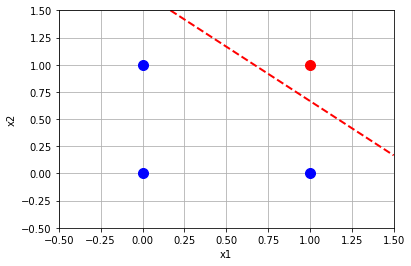

In [ ]:
num_of_samples = 10
x1 = np.linspace(x1_min, x1_max, num_of_samples) 
x2 = np.linspace(x2_min, x2_max, num_of_samples) 

x1_ = np.concatenate((x1, x1))
x2_min_and_max = np.concatenate((np.full(num_of_samples, x2_min, dtype=float), np.full(num_of_samples, x2_max, dtype=float)))
X1 = np.c_[x1_, x2_min_and_max]
x2_ = np.concatenate((x2, x2))
x1_min_and_max = np.concatenate((np.full(num_of_samples, x1_min, dtype=float), np.full(num_of_samples, x1_max, dtype=float)))
X2 = np.c_[x1_min_and_max, x2_] 

# https://stackoverflow.com/questions/38073791/flatten-numpy-array-without-double-for-loop/38073913#38073913 
X_new = np.column_stack((X1.ravel(),X2.ravel())) 

y_hat = and_tl_clf.forward(X_new) 
y_hat = (y_hat > 0.5).astype(int).flatten() 

plt.plot(X[:-1, 0], X[:-1, 1], 'b.', markersize=20) 
plt.plot(X[-1, 0], X[-1, 1], 'r.', markersize=20) 
plt.plot(X_new[y_hat == 1][0][:], X_new[y_hat == 1][1][:], "r--", linewidth=2)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

<결과 비교용> 

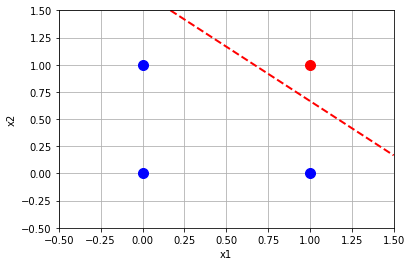

# Logical XOR 연산 

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

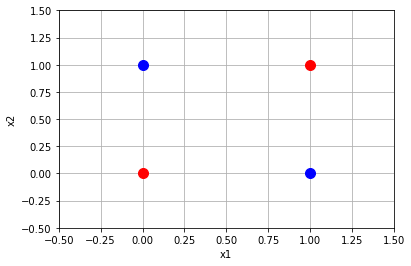

In [6]:
plt.plot(X[0::3, 0], X[0::3, 1], 'r.', markersize=20)
plt.plot(X[1:3, 0], X[1:3, 1], 'b.', markersize=20)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [7]:
# https://stackoverflow.com/questions/65643248/one-hot-encoding-from-numpy
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [8]:
y_ = get_one_hot(y.reshape(-1), 2)

In [ ]:
################################################## 
# Logical XOR 연산 구현 위한 2층 인공신경망 생성 # 
################################################## 
xor_tl_clf = TwoLayer_Classifier(in_features=X.shape[1], out_features=y_.shape[1], eta=1)
################################################## 
#                  코드 작성 끝                  # 
################################################## 

n_iterations = 20000 
for iteration in range(n_iterations): 
    ################################################## 
    #       순전파, 손실 계산, 역전파 수행하기       # 
    ################################################## 
    y_hat = xor_tl_clf.forward(X) 
    loss = xor_tl_clf.mean_square_error(y_) 
    xor_tl_clf.backward()
    ################################################## 
    #                  코드 작성 끝                  # 
    ################################################## 

In [ ]:
loss 

0.000514124186151812

<결과 비교용> 

0.036086951908816056 

In [ ]:
y_hat.argmax(axis=1)

array([0, 1, 1, 0])

<결과 비교용> 

array([0, 1, 1, 0]) 

---
입출력을 Bipolar representation으로 바꾸기

Hint: 데이터 입출력 값과 활성화 함수만 바꾸면 됨!

---

In [75]:
# [11강] 인공신경망 - Learnable machine (1).pdf 
# [6강] 로지스틱회귀_v2.pdf p.12 
# 밑바닥부터 시작하는 딥러닝 p.137 
class TwoLayer_Classifier: 
    def __init__(self, in_features=100, hidden_features=100, out_features=100, eta=0.001): 
        self.eta = eta 

        self.W1 = np.random.randn(in_features, hidden_features) 
        self.b1 = np.random.randn(1, hidden_features) 
        self.W2 = np.random.randn(hidden_features, out_features) 
        self.b2 = np.random.randn(1, out_features) 

        self.sigmoid = lambda z : 1 / (1 + np.exp(-z))

        self.tanh = lambda z : np.tanh(z)

        self.y_hat = None 

        self.for_backward = {} 
        self.for_backward['e'] = None 
        self.for_backward['a2'] = None 
        self.for_backward['a1'] = None 
        self.for_backward['X'] = None 
        ################################################## 
        #     logistic sigmoid에 대한 편미분 구하기      # 
        ################################################## 
        self.tanh_prime = lambda a : (1+a) * (1-a)
        self.sigmoid_prime = lambda a : a * (1-a)
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.grad = {} 
        self.grad['W2'] = None 
        self.grad['b2'] = None 
        self.grad['W1'] = None 
        self.grad['b1'] = None 

    def forward(self, X): 
        ################################################## 
        #                  순전파 구현                   # 
        ################################################## 
        z1 = self.b1 + X.dot(self.W1)
        a1 = self.sigmoid(z1)
        z2 = self.b2 + a1.dot(self.W2)
        a2 = self.tanh(z2)        
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.y_hat = a2 
        
        self.for_backward['X'] = X 
        self.for_backward['a1'] = a1 
        self.for_backward['a2'] = a2 

        return a2 

    def mean_square_error(self, y): 
        N = y.shape[0] 
        
        assert N == self.y_hat.shape[0]
        ################################################## 
        #           오차 e와 손실 loss 구하기            # 
        ################################################## 
        e = y - self.y_hat
        loss = np.sum(e**2)/2
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.for_backward['e'] = e 

        return loss 

    def backward(self): 
        eta = self.eta 

        e = self.for_backward['e']
        a2 = self.for_backward['a2']
        a1 = self.for_backward['a1']
        X = self.for_backward['X']

        N = X.shape[0]
        ################################################## 
        #          역전파 구현(gradient 구하기)          # 
        ################################################## 
        dLde = e
        deda2 = np.tile(-1, (N, 1)) 
        da2dz2 = self.tanh_prime(a2)
        dz2dW2 = a1
        dz2db2 = np.tile(1, (N, 1))
        delta2 = dLde * deda2 * da2dz2
        delta2 = (-1) * delta2 
        dLdW2 = dz2dW2.T.dot(delta2) 
        dLdb2 = dz2db2.T.dot(delta2)

        # [11강] 인공신경망 - Learnable machine (1).pdf p.23 
        delta1 = self.sigmoid_prime(a1)*np.sum(self.W2.dot(delta2.T),axis=1)
        dz1dW1 = X 
        dz1db1 = np.tile(1, (N, 1)) 
        dLdW1 = dz1dW1.T.dot(delta1)
        dLdb1 = dz1db1.T.dot(delta1)
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.W2 = self.W2 + eta * dLdW2 
        self.W1 = self.W1 + eta * dLdW1 
        self.b2 = self.b2 + eta * dLdb2 
        self.b1 = self.b1 + eta * dLdb1 

        self.grad['W2'] = dLdW2 
        self.grad['W1'] = dLdW1 
        self.grad['b2'] = dLdb2 
        self.grad['b1'] = dLdb1 

In [76]:
X_b = np.array([[-1, -1],
               [-1, 1],
               [1, -1],
               [1, 1]])
y_b = np.array([[1, -1],
                [-1, 1],
                [-1, 1],
                [1, -1]])

In [77]:
################################################## 
# Logical XOR 연산 구현 위한 2층 인공신경망 생성 # 
################################################## 
xor_tl_clf = TwoLayer_Classifier(in_features=X_b.shape[1], out_features=y_b.shape[1], eta=1)
################################################## 
#                  코드 작성 끝                  # 
################################################## 

n_iterations = 20000
for iteration in range(n_iterations): 
    ################################################## 
    #       순전파, 손실 계산, 역전파 수행하기       # 
    ################################################## 
    y_hat = xor_tl_clf.forward(X_b) 
    loss = xor_tl_clf.mean_square_error(y_b) 
    xor_tl_clf.backward()
    ################################################## 
    #                  코드 작성 끝                  # 
    ################################################## 

In [78]:
loss

8.0

<결과 비교용> 

0.0003422382344161708 

In [79]:
y_hat

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

<결과 비교용> 

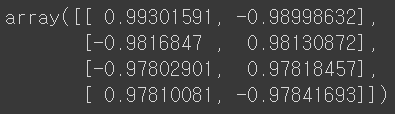

< Bipolarized y_hat > 

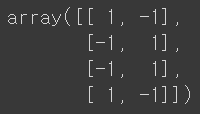

# Digit 분류(Multiclass Classification)   

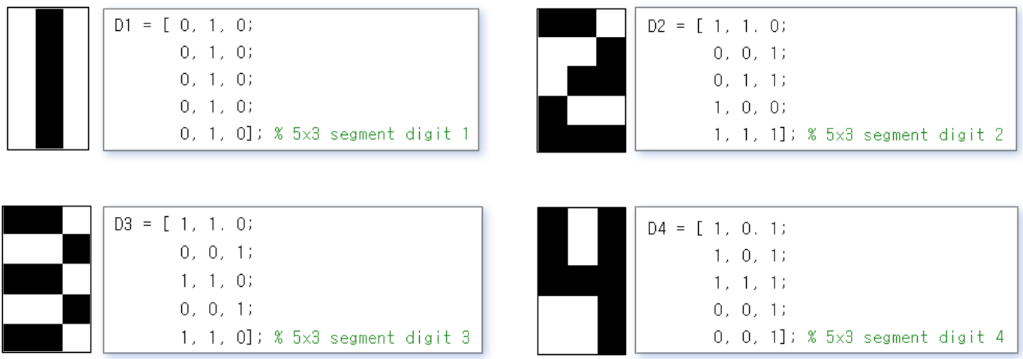

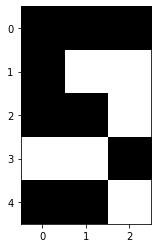

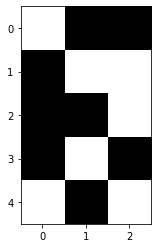

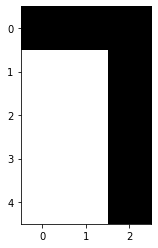

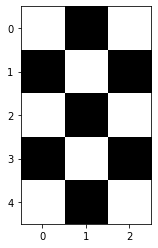

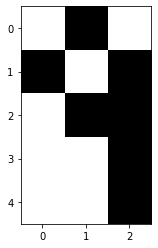

[14강] 인공신경망마무리.pptx p.14 

In [ ]:
D0 = np.array([[1, 1, 1], 
               [1, 0, 1], 
               [1, 0, 1], 
               [1, 0, 1], 
               [1, 1, 1]]) 
D1 = np.array([[0, 1, 0], 
               [0, 1, 0], 
               [0, 1, 0], 
               [0, 1, 0], 
               [0, 1, 0]])
D2 = np.array([[1, 1, 0], 
               [0, 0, 1], 
               [0, 1, 1], 
               [1, 0, 0], 
               [1, 1, 1]])
D3 = np.array([[1, 1, 0], 
               [0, 0, 1], 
               [1, 1, 0], 
               [0, 0, 1], 
               [1, 1, 0]])
D4 = np.array([[1, 0, 1], 
               [1, 0, 1], 
               [1, 1, 1], 
               [0, 0, 1], 
               [0, 0, 1]])
################################################## 
#        5부터 9까지 입력 데이터 준비하기        # 
################################################## 
D5 = np.array([[1, 1, 1], 
               [1, 0, 0], 
               [1, 1, 1], 
               [0, 0, 1], 
               [1, 1, 0]])
D6 = np.array([[0, 1, 1], 
               [1, 0, 0], 
               [1, 1, 0], 
               [1, 0, 1], 
               [0, 1, 0]])
D7 = np.array([[1, 1, 1], 
               [0, 0, 1], 
               [0, 0, 1], 
               [0, 0, 1], 
               [0, 0, 1]])
D8 = np.array([[0, 1, 0], 
               [1, 0, 1], 
               [0, 1, 0], 
               [1, 0, 1], 
               [0, 1, 0]]) 
D9 = np.array([[0, 1, 0], 
               [1, 0, 1], 
               [0, 1, 1], 
               [0, 0, 1], 
               [0, 0, 1]]) 
################################################## 
#                  코드 작성 끝                  # 
################################################## 

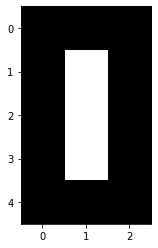

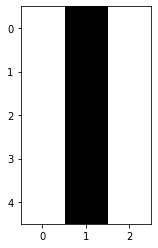

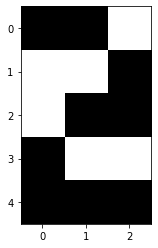

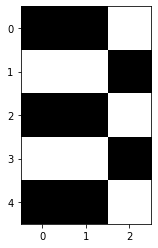

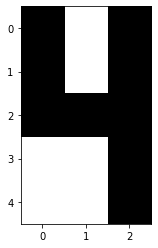

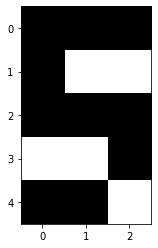

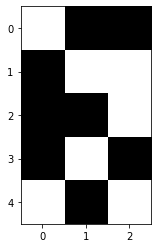

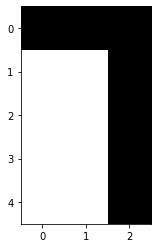

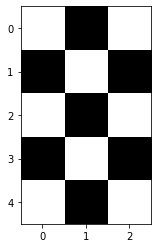

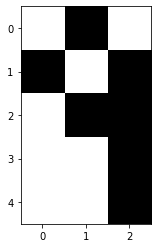

In [ ]:
X = np.array([D0, D1, D2, D3, D4, D5, D6, D7, D8, D9]) 
for x in X: 
    # https://matplotlib.org/stable/api/pyplot_summary.html 
    plt.imshow(x, cmap='gray_r')
    plt.show()

In [ ]:
y = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]) 
y_ = get_one_hot(y.reshape(-1), y.shape[0])

In [ ]:
from scipy.special import softmax 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html 
from sklearn.metrics import log_loss as cross_entropy_loss 

In [ ]:
# [6강] 로지스틱회귀_v2.pdf p.12 
# 밑바닥부터 시작하는 딥러닝 p.137 
class Digit_TwoLayer_Classifier: 
    def __init__(self, in_features=100, hidden_features=100, out_features=100, eta=0.001): 
        self.eta = eta 

        self.W1 = np.random.randn(in_features, hidden_features) 
        self.b1 = np.random.randn(1, hidden_features) 
        self.W2 = np.random.randn(hidden_features, out_features) 
        self.b2 = np.random.randn(1, out_features) 

        self.sigmoid = lambda z : 1 / (1 + np.exp(-z)) 
        self.softmax = softmax 

        self.y_hat = None 

        self.for_backward = {} 
        self.for_backward['y'] = None 
        self.for_backward['a1'] = None 
        self.for_backward['X'] = None 

        ################################################## 
        #     logistic sigmoid에 대한 편미분 구하기      # 
        ################################################## 
        self.sigmoid_prime = lambda a : a * (1-a)
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.softmax_prime = lambda y_hat, y : (y_hat - y) / y.shape[0]

        self.grad = {} 
        self.grad['W2'] = None 
        self.grad['b2'] = None 
        self.grad['W1'] = None 
        self.grad['b1'] = None 

    def forward(self, X): 
        ################################################## 
        #                  순전파 구현                   # 
        ################################################## 
        z1 = self.b1 + X.dot(self.W1) 
        a1 = self.sigmoid(z1)
        z2 = self.b2 + a1.dot(self.W2) 
        a2 = self.softmax(z2, axis=1)
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.y_hat = a2 

        self.for_backward['X'] = X 
        self.for_backward['a1'] = a1 

        return a2 

    def cross_entropy_error(self, y): 
        N = y.shape[0] 

        assert N == self.y_hat.shape[0] 
        ################################################## 
        #                손실 loss 구하기                # 
        ################################################## 
        loss = np.sum(np.log(self.y_hat) * y) / N * (-1)
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.for_backward['y'] = y 

        return loss 

    def backward(self): 
        eta = self.eta 

        y = self.for_backward['y'] 
        a1 = self.for_backward['a1']
        X = self.for_backward['X']

        N = X.shape[0]
        ################################################## 
        #          역전파 구현(gradient 구하기)          # 
        ################################################## 
        delta2 = self.y_hat - y
        delta2 = (-1) * delta2 
        dz2dW2 = a1 
        dz2db2 = np.tile(1, (N, 1)) 
        dLdW2 = dz2dW2.T.dot(delta2) 
        dLdb2 = dz2db2.T.dot(delta2) 

        # [11강] 인공신경망 - Learnable machine (1).pdf p.23
        delta1 = self.sigmoid_prime(a1)*np.sum(self.W2.dot(delta2.T),axis=1)
        dz1dW1 = X 
        dz1db1 = np.tile(1, (N, 1)) 
        dLdW1 = dz1dW1.T.dot(delta1)
        dLdb1 = dz1db1.T.dot(delta1)
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.W2 = self.W2 + eta * dLdW2 
        self.W1 = self.W1 + eta * dLdW1 
        self.b2 = self.b2 + eta * dLdb2 
        self.b1 = self.b1 + eta * dLdb1 

        self.grad['W2'] = dLdW2 
        self.grad['W1'] = dLdW1 
        self.grad['b2'] = dLdb2 
        self.grad['b1'] = dLdb1 

In [ ]:
X_ = X.reshape(X.shape[0], -1).copy()

In [ ]:
################################################## 
#     0~9 숫자 분류 위한 2층 인공신경망 생성     # 
################################################## 
d_tl_clf = Digit_TwoLayer_Classifier(in_features=X_.shape[1], out_features=y_.shape[1], eta=0.1) 
################################################## 
#                  코드 작성 끝                  # 
################################################## 

n_iterations = 10000 
for iteration in range(n_iterations): 
    ################################################## 
    #       순전파, 손실 계산, 역전파 수행하기       # 
    ################################################## 
    y_hat = d_tl_clf.forward(X_) 
    loss = d_tl_clf.cross_entropy_error(y_) 
    d_tl_clf.backward()
    ################################################## 
    #                  코드 작성 끝                  # 
    ################################################## 

In [ ]:
loss

0.002242755090547819

<결과 비교용> 

0.05799271738956865 

In [ ]:
y_hat.argmax(axis=1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<결과 비교용> 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

---
Scikit-learn 
---


In [ ]:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html 
from sklearn.neural_network import MLPClassifier 
################################################## 
#  MLPClassifier로 Digit 분류기 구현(생성&훈련)  # 
################################################## 
d_mlp_clf = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(30, ), learning_rate_init=0.01, random_state=2021) 
d_mlp_clf.fit(X_, y) 
################################################## 
#                  코드 작성 끝                  # 
################################################## 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2021, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

<결과 비교용> 

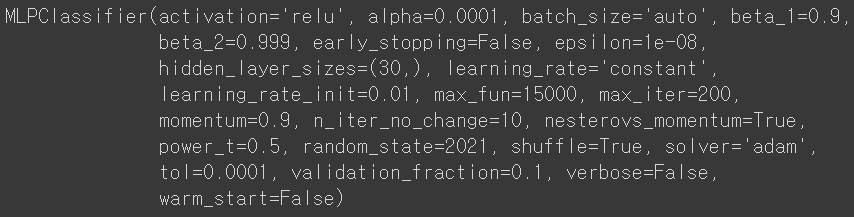

In [ ]:
d_mlp_clf.predict(X_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<결과 비교용> 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

---
오른쪽으로 한 칸씩 이동하여서 분류 결과 보기 
---

In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.roll.html 
np.roll(D0, 1, axis=1)

array([[1, 1, 1],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 1]])

In [ ]:
for x in X: 
    ################################################## 
    # Digit 마다 우측으로 한 칸씩 이동하여 분류 하기 # 
    ################################################## 
    x_shifted = np.roll(x,1,axis=1)
    x_shifted = x_shifted.flatten() 
    print(d_mlp_clf.predict(x_shifted.reshape(1,-1)), end=' ')
    ################################################## 
    #                  코드 작성 끝                  # 
    ################################################## 

[0] [7] [0] [0] [5] [0] [1] [0] [0] [0] 

<결과 비교용> 

0 7 0 6 2 2 1 0 0 0 